In [1]:
import os
import cv2
import numpy as np
from utils import params, jacard_coef, scale_image_pixels, cat2rgb, DataGenerator, load_test_masks
from keras.models import load_model
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import matplotlib.pyplot as plt

2023-06-06 12:21:33.877451: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-06 12:21:34.053564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 12:21:35.115206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Segmentation Models: using `keras` framework.


In [2]:
data_dir = 'data'
weights_path = 'weights'
target_shape = (480, 288)
output_shape = (288, 480, 3)
batch_size = 10

In [3]:
test = DataGenerator(data_dir=data_dir, shape=target_shape, split='test', batch_size=batch_size)

In [4]:
total_loss, metrics = params(weights_path)
model = load_model('models/comma_U_last.hdf5', custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef })
pred = model.predict(test)
pred = np.argmax(pred, axis=-1)
truth_argmax = load_test_masks(data_dir, target_shape)

2023-06-05 21:54:51.754360: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-05 21:54:51.754413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: Priyansh-Ubuntu
2023-06-05 21:54:51.754419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: Priyansh-Ubuntu
2023-06-05 21:54:51.754623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-06-05 21:54:51.754649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-06-05 21:54:51.754655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3
2023-06-05 21:54:52.932115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executo

9/9 [==============================] - 8s 793ms/step


In [26]:
pred.shape

(90, 288, 480)

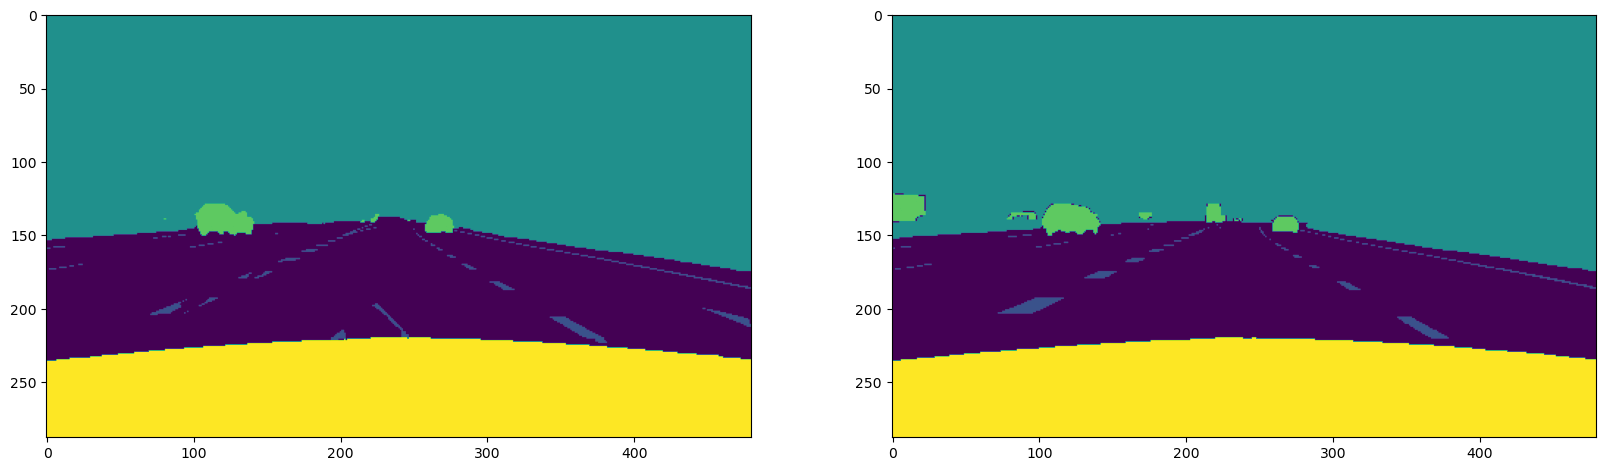

In [25]:
n = 11
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(pred[n])
plt.subplot(122)
plt.imshow(truth_argmax[n])
plt.show()

In [7]:
total_loss, metrics = params(weights_path)
model_squeeze_mid = load_model('models/comma_Squeeze_mid.h5', custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef })
model_squeeze_last = load_model('models/comma_Squeeze_last.hdf5', custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef })
model_u_mid = load_model('models/comma_U_mid.h5', custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef })
model_u_last = load_model('models/comma_U_last.hdf5', custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef })

In [8]:
carla = []
carla.append(cv2.cvtColor(cv2.resize(cv2.imread('/home/priyansh/Downloads/Loopway/Semantic_Segmentation/Carla.jpeg'), target_shape), cv2.COLOR_BGR2RGB))
carla = scale_image_pixels(carla)

In [9]:
carla.shape

(1, 288, 480, 3)

In [10]:
pred_squeeze_mid = model_squeeze_mid.predict(carla)
pred_squeeze_last = model_squeeze_last.predict(carla)
pred_u_mid = model_u_mid.predict(carla)
pred_u_last = model_u_last.predict(carla)

1/1 [==============================] - 0s 302ms/step


In [11]:
pred_squeeze_mid = cat2rgb(pred_squeeze_mid, output_shape)
pred_squeeze_last = cat2rgb(pred_squeeze_last, output_shape)
pred_u_mid = cat2rgb(pred_u_mid, output_shape)
pred_u_last = cat2rgb(pred_u_last, output_shape)

In [12]:
# pred_squeeze_mid = np.argmax(pred_squeeze_mid, axis=-1)
# pred_squeeze_last = np.argmax(pred_squeeze_last, axis=-1)
# pred_u_mid = np.argmax(pred_u_mid, axis=-1)
# pred_u_last = np.argmax(pred_u_last, axis=-1)

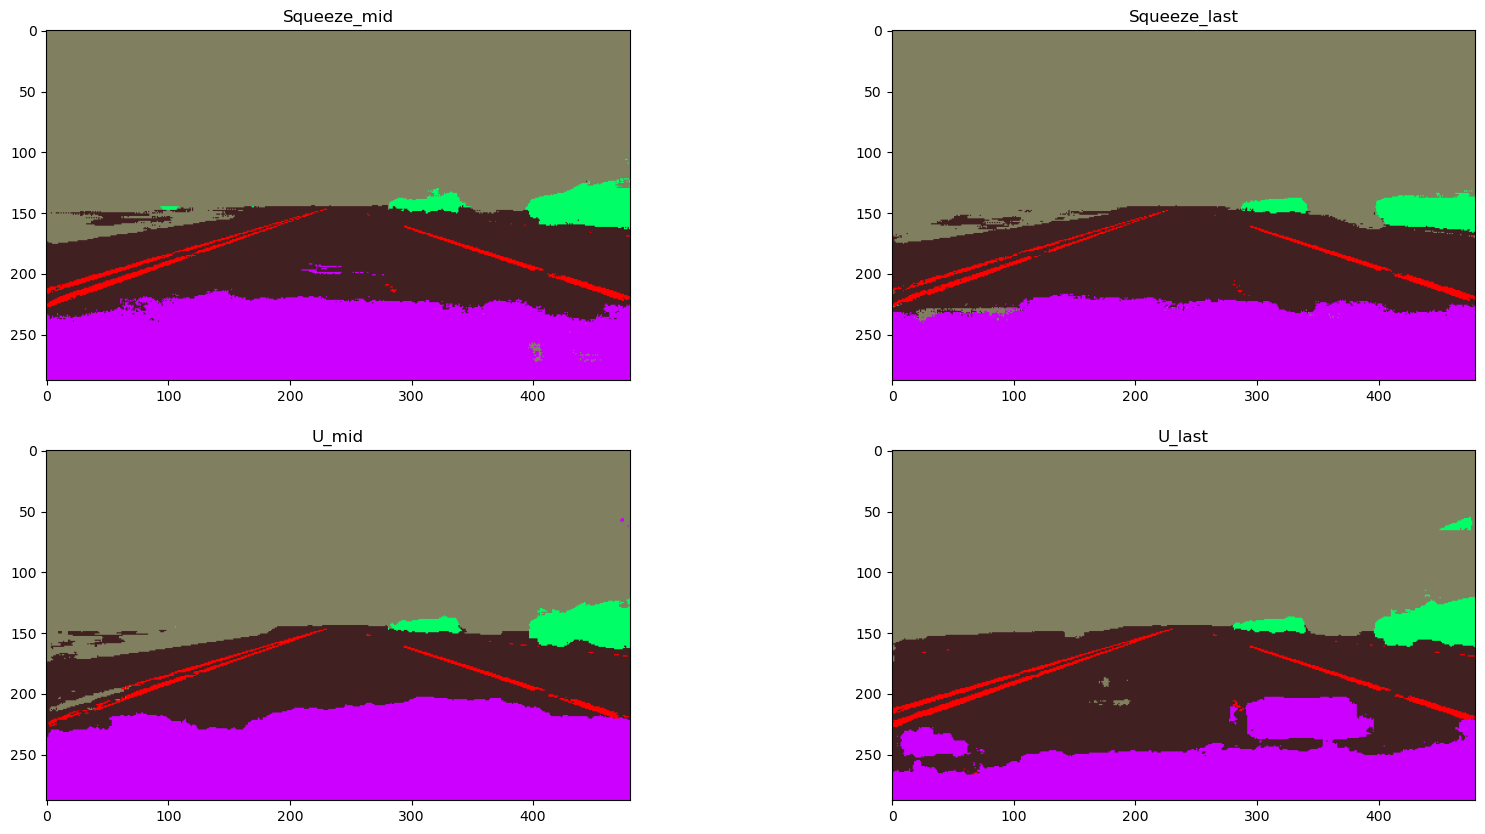

In [13]:
n = 0
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('Squeeze_mid')
plt.imshow(pred_squeeze_mid[n])
plt.subplot(222)
plt.title('Squeeze_last')
plt.imshow(pred_squeeze_last[n])
plt.subplot(223)
plt.title('U_mid')
plt.imshow(pred_u_mid[n])
plt.subplot(224)
plt.title('U_last')
plt.imshow(pred_u_last[n])
plt.show()

In [14]:
cv2.imwrite('prediction.jpg', cv2.cvtColor(pred_u_last[0], cv2.COLOR_RGB2BGR))

True

In [15]:
predict = 'data/test/imgs'
new = [os.path.join(predict, line) for line in os.listdir(predict) if line.endswith('.png')]
new

['data/test/imgs/r032_1b3eee4d8a1d8586_2019-04-01--01-07-01_12_830.png',
 'data/test/imgs/r043_095d5469458829d8_2019-06-01--22-41-45_20_226.png',
 'data/test/imgs/r048_187e19c47657a5cf_2019-03-17--16-13-36_29_100.png',
 'data/test/imgs/r006_401f1a07aeb8aa63_2019-03-05--19-05-20_5_50.png',
 'data/test/imgs/r039_0c8c438393d93a39_2019-04-26--21-22-27_38_425.png',
 'data/test/imgs/r033_1b3eee4d8a1d8586_2019-04-01--01-07-01_12_600.png',
 'data/test/imgs/r035_437cf078b5fcc611_2019-05-29--15-26-16_23_1000.png',
 'data/test/imgs/r062_434cefdade70e871_2019-05-25--18-09-19_59_180.png',
 'data/test/imgs/r014_29673c09433cb3d9_2019-04-10--08-02-38_33_564.png',
 'data/test/imgs/r067_0c5c849415c7dba2_2019-03-14--07-39-44_32_450.png',
 'data/test/imgs/r024_0fcd4b3c68d5a5dc_2019-04-18--18-15-10_8_640.png',
 'data/test/imgs/r008_187e19c47657a5cf_2019-03-12--17-24-56_11_700.png',
 'data/test/imgs/r069_02c45f73a2e5c6e9_2020-06-03--10-27-13_5_1100.png',
 'data/test/imgs/u003_8bf7e79a3ce64055_2021-04-29--12

In [3]:
import os
from utils import params, jacard_coef, scale_image_pixels, cat2rgb, DataGenerator, load_test_masks

2023-06-06 12:46:19.673731: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-06 12:46:19.719526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 12:46:20.390652: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Segmentation Models: using `keras` framework.


In [6]:
path = 'June-5'
target_shape = (480, 288)

In [ ]:
total_loss, metrics = params(weights_path)
model = load_model('models/comma_U_last.hdf5', custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef })

In [5]:
for path, subdirs, files in os.walk(path):

    dirname = path.split(os.path.sep)[-1]

    if dirname == 'images':
        predict = DataGenerator(path, target_shape, split='predict')
        

## predict

In [1]:
import os
import cv2
import numpy as np
from utils import params, jacard_coef, cat2rgb, save_predictions, DataGenerator
from keras.models import load_model
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import matplotlib.pyplot as plt

2023-06-06 18:40:31.367066: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-06 18:40:31.406301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 18:40:31.970656: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Segmentation Models: using `keras` framework.


In [2]:
data_dir = 'All_Data/June-5'
weights_path = 'weights'
target_shape = (480, 288)
output_shape = (288, 480, 3)
model_path = 'models/comma_U_last.hdf5'

In [3]:
total_loss, metrics = params(weights_path)
model = load_model(model_path, custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef })

2023-06-06 18:40:33.768845: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-06 18:40:33.768900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: Priyansh-Ubuntu
2023-06-06 18:40:33.768904: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: Priyansh-Ubuntu
2023-06-06 18:40:33.769032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-06-06 18:40:33.769048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-06-06 18:40:33.769052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3


In [4]:
with open(os.path.join(data_dir, 'retrain/files'), 'r') as file:
    names = [line.strip() for line in file.readlines()]

In [9]:
names

['0093_aee00e7a217cbe97_2018-07-29--19-34-33_93_921.png',
 '0082_4ea7f6e00a335885_2018-06-26--14-57-03_10_282.png',
 'r006_401f1a07aeb8aa63_2019-03-05--19-05-20_5_50.png',
 '0022_0afcc356dc79a1f8_2018-09-20--00-47-49_7_739.png',
 '0013_f550e313a9262051_2018-05-21--17-33-38_26_590.png',
 '0048_55d35794f4955cd1_2018-08-22--22-23-27_12_805.png',
 '0058_886f3f426ddfd8c6_2018-09-11--18-21-31_7_597.png',
 '0030_104c93f0dcbbaf5a_2018-10-10--14-31-04_57_149.png',
 '0044_08a9ba730b8de80d_2018-11-17--17-28-16_37_844.png',
 '0100_b5e785c1fc446ed0_2018-11-08--05-40-49_17_800.png',
 '0035_3cfe5e44e6223c14_2018-10-09--14-29-09_22_505.png',
 '0053_cc0342d8a2184b9d_2018-07-10--19-32-08_88_320.png',
 '0008_b8727c7398d117f5_2018-10-22--15-38-24_71_990.png',
 '0021_1aaddf65aad975af_2018-07-31--07-59-51_1_124.png',
 '0002_e8e95b54ed6116a6_2018-09-05--22-04-33_2_608.png',
 '0033_436e875d619a9241_2018-11-10--03-19-26_4_200.png',
 '0067_24d8e3bdd70fc55d_2018-09-01--19-38-32_10_1160.png',
 '0071_a60668e197b93

In [5]:
predict = DataGenerator(data_dir, target_shape, split='predict')

In [6]:
prediction = model.predict(predict)
prediction = cat2rgb(prediction, output_shape)

2023-06-06 18:40:34.542843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 7s 601ms/step


In [10]:
save_predictions(prediction, data_dir, names)

In [1]:
import os
from keras.models import load_model
from utils import num_classes, params, DataGenerator, jacard_coef
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

2023-06-06 19:36:52.554339: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-06 19:36:52.589654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 19:36:53.221892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Segmentation Models: using `keras` framework.


In [2]:
data_dir = 'All_Data/June-5'
target_shape = (480, 288)
# input_shape = (480, 288, 3)
batch_size = 10
epochs = 1
shuffle = False
weights_path = 'weights'
model_path = 'models/comma_U_last.hdf5'
checkpoint_name = 'models/check.h5'
final_model = 'models/retrain.hdf5'

In [3]:
n_labels = num_classes()
total_loss, metrics = params(weights_path)
model = load_model(model_path, custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef })

2023-06-06 19:36:54.742643: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-06 19:36:54.742673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: Priyansh-Ubuntu
2023-06-06 19:36:54.742677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: Priyansh-Ubuntu
2023-06-06 19:36:54.742826: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-06-06 19:36:54.742841: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-06-06 19:36:54.742844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3


In [4]:
retrain = DataGenerator(data_dir=data_dir, shape=target_shape, split='retrain', batch_size=batch_size, shuffle=shuffle)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(retrain, test_size = 0.2, random_state=42)

TypeError: only integer scalar arrays can be converted to a scalar index

In [5]:
model.fit(retrain, epochs=epochs, verbose=1)
model.save(final_model)

2023-06-06 19:36:58.230295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 27s 2s/step - loss: 0.8043 - accuracy: 0.9892 - jacard_coef: 0.9688
